# Statistik-Labor Testat Aufgabe 2
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Untersuchen Sie die Bevölkerungsentwicklung der USA. <br>
In der Datei **sr_aufg_2_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält zwei Spalten fester Breite: Jahreszahl und Anzahl der Einwohner der USA in Millionen (zu einem festen Stichtag in dem angegebenen Jahr).

## a) Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

In [56]:
import pandas as pd

# Datei einlesen: Spalten durch beliebige Leerzeichen trennen
df = pd.read_csv(
    "/home/gen69/Python/Statistics/Testate/datasets/Endziffer_01/sr_aufg_2_01.txt",
    sep=r"\s+",
    header=None,
    names=["Jahr", "Einwohner"],
    engine="python"
)

# Kommas in Punkten umwandeln und in Float konvertieren
df["Einwohner"] = df["Einwohner"].astype(str).str.replace(",", ".", regex=False).astype(float)

# Prüfen, ob 1800 fehlt
if 1800 not in df["Jahr"].values:
    # Werte um 1800 finden
    vor = df.loc[df["Jahr"] == 1790, "Einwohner"].values[0]
    nach = df.loc[df["Jahr"] == 1810, "Einwohner"].values[0]
    interpoliert = vor + (nach - vor) / 2

    # Eintrag für 1800 ergänzen
    df = pd.concat([df, pd.DataFrame([[1800, interpoliert]], columns=["Jahr", "Einwohner"])])

    # Nach Jahr sortieren
    df = df.sort_values("Jahr").reset_index(drop=True)




## b) Streudiagramm erstellen
Stellen Sie die Bevölkerungsentwicklung in einem Streudiagramm dar.

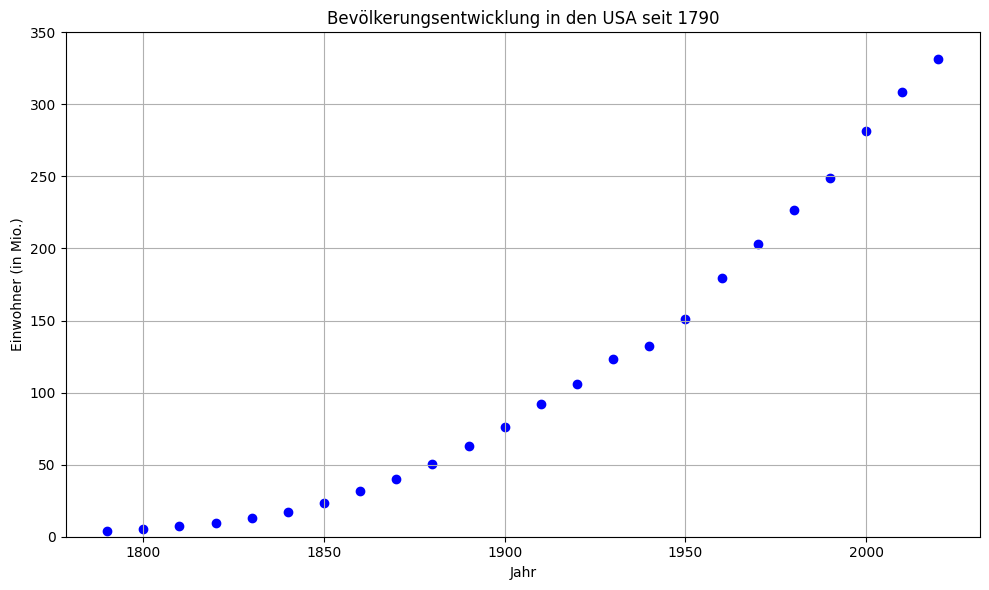

In [57]:
import matplotlib.pyplot as plt

# Streudiagramm erstellen (basierend auf dem bereits vorhandenen df)
plt.figure(figsize=(10, 6))
plt.scatter(df["Jahr"], df["Einwohner"], color="blue", marker="o")

# Achsen und Titel
plt.xlabel("Jahr")
plt.ylabel("Einwohner (in Mio.)")
plt.title("Bevölkerungsentwicklung in den USA seit 1790")
plt.ylim(0, 350)
plt.grid(True)
plt.tight_layout()

plt.show()


## c) Regressionskurven bestimmen
Untersuchen Sie je nach Matrikelnummer Ihre 5 Funktionen um eine Regressionskurve durch die Punkte zu legen:<br>

| Gerade Matrikelnummer-Endung: | Ungerade Matrikelnummer-Endung: |
| :- | :- |
| Lineare Funktion: $\;\;$ $y = ax+b$ | Lineare Funktion: $\;\;$ $y = ax+b$ |
| Polynom 2. Grades: $y = ax^2+bx+c$ | Polynom 2. Grades: $y = ax^2+bx+c$ |
| Polynom 4. Grades: $y=ax^4+bx^3+cx^2+dx+e$ | Polynom 3. Grades: $y=ax^3+bx^2+cx+d$ |
| Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ | Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ |
| Exponentialfunktion: $y=a \cdot{\rm e}^{bx}$ | Logarithmusfunktion: $y=a \cdot\ln{(x)}-b$ |

Stellen Sie **in einer Tabelle den Regressionstyp** (z.B. lineare Funktion, Polynom 2. Grades, …), die **geschätzten Koeffizienten mit Achsenabschnitt und das Bestimmtheitsmaß** dar.

***Tipp:***<br>
Verwenden Sie für die Schätzung der Regressionskurve und des Bestimmtheitsmaßes standardisierte Eingangswerte (Jahreszahlen)

In [58]:
import numpy as np
#import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Jahr und Einwohner als Arrays vorbereiten (mit .to_numpy() für die reshape-Operation)
jahre = df["Jahr"].to_numpy().reshape(-1, 1)
einwohner = df["Einwohner"].to_numpy()

# Ergebnisliste
ergebnisse = []

# 1. Lineare Regression (y = ax + b)
lin_model = LinearRegression()
lin_model.fit(jahre, einwohner)
y_pred_lin = lin_model.predict(jahre)
r2_lin = r2_score(einwohner, y_pred_lin)
ergebnisse.append({
    "Modell": "Linear (y = ax + b)",
    "Koeffizienten": f"a={lin_model.coef_[0]:.4f}, b={lin_model.intercept_:.4f}",
    "R²": f"{r2_lin:.4f}"
})

# 2. Polynom 2. Grades (y = ax² + bx + c)
poly2 = np.polyfit(df["Jahr"], einwohner, deg=2)
y_pred_poly2 = np.polyval(poly2, df["Jahr"])
r2_poly2 = r2_score(einwohner, y_pred_poly2)
ergebnisse.append({
    "Modell": "Polynom 2. Grades",
    "Koeffizienten": f"a={poly2[0]:.6e}, b={poly2[1]:.4f}, c={poly2[2]:.4f}",
    "R²": f"{r2_poly2:.4f}"
})

# 3. Polynom 3. Grades (y = ax³ + bx² + cx + d)
poly3 = np.polyfit(df["Jahr"], einwohner, deg=3)
y_pred_poly3 = np.polyval(poly3, df["Jahr"])
r2_poly3 = r2_score(einwohner, y_pred_poly3)
ergebnisse.append({
    "Modell": "Polynom 3. Grades",
    "Koeffizienten": f"a={poly3[0]:.6e}, b={poly3[1]:.4f}, c={poly3[2]:.4f}, d={poly3[3]:.4f}",
    "R²": f"{r2_poly3:.4f}"
})

# 4. Polynom 6. Grades
poly6 = np.polyfit(df["Jahr"], einwohner, deg=6)
y_pred_poly6 = np.polyval(poly6, df["Jahr"])
r2_poly6 = r2_score(einwohner, y_pred_poly6)
koeffs6 = ", ".join([f"{c:.2e}" for c in poly6])
ergebnisse.append({
    "Modell": "Polynom 6. Grades",
    "Koeffizienten": koeffs6,
    "R²": f"{r2_poly6:.4f}"
})

# 5. Logarithmische Regression: y = a * ln(x) - b
# ACHTUNG: ln(x) nur mit positiven Werten → Jahr > 0 ist gegeben
log_X = np.log(df["Jahr"]).to_numpy().reshape(-1, 1)
log_model = LinearRegression()
log_model.fit(log_X, einwohner)
y_pred_log = log_model.predict(log_X)
r2_log = r2_score(einwohner, y_pred_log)
ergebnisse.append({
    "Modell": "Logarithmus (y = a * ln(x) - b)",
    "Koeffizienten": f"a={log_model.coef_[0]:.4f}, b={log_model.intercept_:.4f}",
    "R²": f"{r2_log:.4f}"
})

# Darstellung als DataFrame
vergleich_df = pd.DataFrame(ergebnisse)
vergleich_df



,Modell,Koeffizienten,R²
0,Linear (y = ax + b),"a=1.4240, b=-2599.2272",0.9214
1,Polynom 2. Grades,"a=6.701909e-03, b=-24.1103, c=21690.0557",0.9992
2,Polynom 3. Grades,"a=3.273760e-06, b=-0.0120, c=11.5032, d=-888.7417",0.9993
3,Polynom 6. Grades,"-2.89e-11, 3.29e-07, -1.56e-03, 3.96e+00, -5.6...",0.9996
4,Logarithmus (y = a * ln(x) - b),"a=2697.1248, b=-20254.0180",0.9125


## d) Beste Kurve wählen
Wählen Sie aus den von Ihnen untersuchten Möglichkeiten die am besten geeignete Kurve. **Erläutern** Sie Ihre Wahl.

In [59]:
# Die 3 polynome habe im vergleich zu linear und logarithmischen regressionstypen
# Ein bestimmtheitsmaß-unterschied von min. 7 => sind daher wesentlich genauer
# Die polynome unterscheiden sich untereinander aber nur von der 4. nachkommastele
# Daher ist die genauigkeit überschaubar und bin blick auf die Aufwendigkeit ist
# das  Polynom 2. Grades die Beste Modellwahl
# Beim polynom 6. Grades läuft zudem die gefahr auf "Overfitting"


## e) Streudiagramm mit Regressionskurve
Zeichnen Sie in das Streudiagramm die optimale Regressionskurve aus 4) ein. Dabei sollen auf der x-Achse die Jahreszahlen und auf der y-Achse die Bevölkerungszahl angegeben sein.

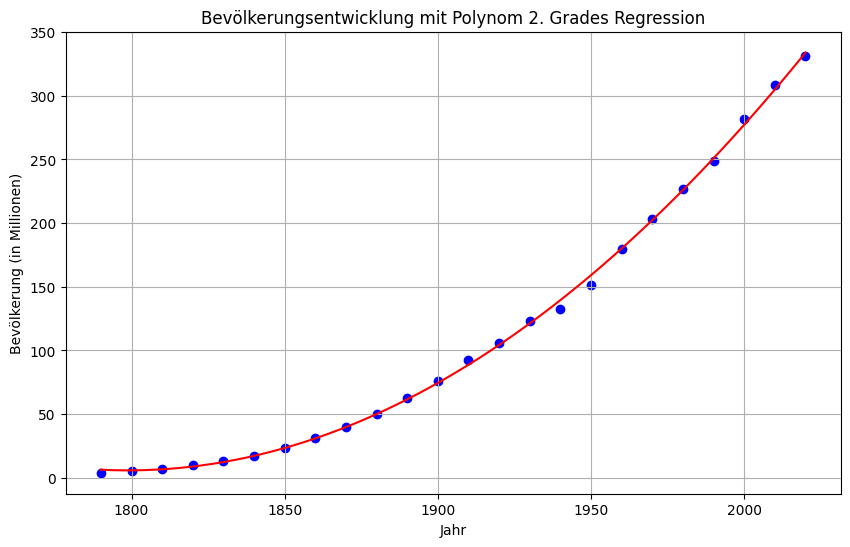

In [60]:
#import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import Polynomial

# Beispielhafte Daten (ersetzen mit deinem DataFrame df)
# df = pd.read_csv("/path/to/your/file.txt", sep=r'\s+')

# Jahr und Einwohner aus dem DataFrame entnehmen
x = df['Jahr']
y = df['Einwohner']

# Streudiagramm erstellen
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')

# Fit des 2. Grad Polynoms (quadratische Funktion)
coeffs = np.polyfit(x, y, 2)  # 2 steht für den Grad des Polynoms (2. Grad)
poly = np.poly1d(coeffs)

# Erstellen von Punkten für die Regressionskurve
x_line = np.linspace(min(x), max(x), 1000)
y_line = poly(x_line)

# Regressionskurve einzeichnen
plt.plot(x_line, y_line, color='red')

# Achsen beschriften
plt.xlabel('Jahr')
plt.ylabel('Bevölkerung (in Millionen)')
plt.title('Bevölkerungsentwicklung mit Polynom 2. Grades Regression')

# Legende
#plt.legend()

# Diagramm anzeigen
plt.grid(True)
plt.show()


## f) Prognose für das Jahr 2030
Berechnen Sie aus den Ihnen vorgelegten Daten eine Prognose über die Bevölkerungszahl der USA im Jahr 2030. **Erläutern** Sie Ihr Vorgehen.

***Tipp:***<br>
Beim Wert für die Prognose sollten Sie überlegen, ob Ihr Wert stimmen kann oder ob er nicht vielleicht völlig unrealistisch ist. <br>
Der Grund für unrealistische Werte ist dabei evtl. gar nicht in der Wahl der Regressionsvariante zu suchen, sondern evtl. darin, dass numerische Probleme vorliegen und die geschätzten Koeffizienten mit zu wenigen Nachkommastellen verwendet werden!

In [61]:
import numpy as np

# Sicherstellen, dass die Spaltennamen korrekt sind
df.columns = df.columns.str.strip()  # Falls Spaltennamen Leerzeichen enthalten

# Berechnung der Regressionskurve 2. Grades
coeffs = np.polyfit(df['Jahr'], df['Einwohner'], 2)

# Erstelle das Polynom
poly = np.poly1d(coeffs)

# Ausgabe der Koeffizienten
print("Koeffizienten des Polynoms 2. Grades:", coeffs)

# Prognose für 2030
jahr_2030 = 2030
prognose_2030 = poly(jahr_2030)

# Ausgabe der Prognose
print("Prognose für die Bevölkerungszahl im Jahr 2030: " + str(prognose_2030) + " Millionen")




Koeffizienten des Polynoms 2. Grades: [ 6.70190924e-03 -2.41102571e+01  2.16900557e+04]
Prognose für die Bevölkerungszahl im Jahr 2030: 364.13159508031094 Millionen
